# Autocolorize

Testing `Automatic colorizaton of grayscale images using Deep Learning `

Paper: http://people.cs.uchicago.edu/~larsson/colorization/

Code: https://github.com/gustavla/autocolorize

In [1]:
! pip3 install autocolorize

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 30.2 MB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 159 kB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.8 MB/s eta 0:00:01


In [13]:
! sudo apt install caffe-cpu -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  docutils-common fonts-elusive-icons fonts-font-awesome fonts-mathjax
  libavcodec-dev libavdevice58 libavformat-dev libavresample-dev
  libavresample4 libavutil-dev libdc1394-22-dev libexif-dev libexif-doc
  libgdcm-dev libgl2ps1.4 libgphoto2-dev libilmbase-dev libjbig-dev
  libjpeg-dev libjpeg-turbo8-dev libjpeg8-dev libjs-mathjax libjs-sphinxdoc
  libjs-underscore liblept5 liblzma-dev libnetcdf-c++4 libopenal-data
  libopenal1 libopencv-calib3d-dev libopencv-calib3d4.2 libopencv-contrib-dev
  libopencv-contrib4.2 libopencv-core-dev libopencv-dnn-dev libopencv-dnn4.2
  libopencv-features2d-dev libopencv-features2d4.2 libopencv-flann-dev
  libopencv-flann4.2 libopencv-highgui-dev libopencv-highgui4.2
  libopencv-imgcodecs-dev libopencv-imgproc-dev libopencv-ml-dev
  libopencv-ml4.2 libopencv-objdetect-dev libop

7Progress: [ 17%] [#########.................................................] 8Selecting previously unselected package python3-nose.
Preparing to unpack .../18-python3-nose_1.3.7-5_all.deb ...
Unpacking python3-nose (1.3.7-5) ...
7Progress: [ 18%] [##########................................................] 8Selecting previously unselected package python3-pandas-lib.
Preparing to unpack .../19-python3-pandas-lib_0.25.3+dfsg-7_amd64.deb ...
Unpacking python3-pandas-lib (0.25.3+dfsg-7) ...
7Progress: [ 19%] [###########...............................................] 8Selecting previously unselected package python3-pandas.
Preparing to unpack .../20-python3-pandas_0.25.3+dfsg-7_all.deb ...
Unpacking python3-pandas (0.25.3+dfsg-7) ...
7Progress: [ 20%] [###########...............................................] 8Selecting previously unselected package liblbfgsb0:amd64.
Preparing to unpack .../21-liblbfgsb0_3.0+dfsg.3-7build1_amd64.deb ...
Unpacking liblbfgsb0:amd64 (3.0+dfsg.3-7

Selecting previously unselected package python3-tables-lib.
Preparing to unpack .../48-python3-tables-lib_3.6.1-2build1_amd64.deb ...
7Progress: [ 46%] [##########################................................] 8Unpacking python3-tables-lib (3.6.1-2build1) ...
Selecting previously unselected package python3-tables.
Preparing to unpack .../49-python3-tables_3.6.1-2build1_all.deb ...
7Progress: [ 47%] [###########################...............................] 8Unpacking python3-tables (3.6.1-2build1) ...
Selecting previously unselected package python3-xlrd.
Preparing to unpack .../50-python3-xlrd_1.1.0-5_all.deb ...
7Progress: [ 48%] [############################..............................] 8Unpacking python3-xlrd (1.1.0-5) ...
Selecting previously unselected package python3-xlwt.
Preparing to unpack .../51-python3-xlwt_1.3.0-3_all.deb ...
7Progress: [ 49%] [############################..............................] 8Unpacking python3-xlwt (1.3.0-3) ...
Setting up libleve

The package includes an API for colorizing images. We will load sample images and compare them to the model output.

In [2]:
import lmdb
import io
import numpy as np
from PIL import Image
import autocolorize
import matplotlib.pyplot as plt
%matplotlib inline

We will use images from the bedroom dataset from [LSUN](https://github.com/fyu/lsun). 

In [3]:
def get_image_data(db_path):
    env = lmdb.open(db_path, map_size=1099511627776,
                    max_readers=100, readonly=True)
    images = []
    with env.begin(write=False) as txn:
        cursor = txn.cursor()
        for key, val in cursor:
            # Get image data in bytes
            img = io.BytesIO(val)
            # Convert to numpy array in RGB space
            img = np.array(Image.open(io.BytesIO(val)).convert('RGB'))
            images.append(img)
    return images

In [4]:
images = get_image_data('bedroom_val_lmdb')

The line below loads the pre-trained model weights for the autocolorizer. The model takes in a grayscale image represented by a numpy float array with values between $[0,1]$ (to indicate lightness). The output is an array with RGB channels.

In [5]:
classifier = autocolorize.load_default_classifier()

Loading /home/katie9/.autocolorize/autocolorize.caffemodel.h5


In [6]:
grayscale = np.array(Image.fromarray(images[0]).convert('L'))/255
rgb = autocolorize.colorize(grayscale, classifier=classifier)

Text(0.5, 1.0, 'Model Output')

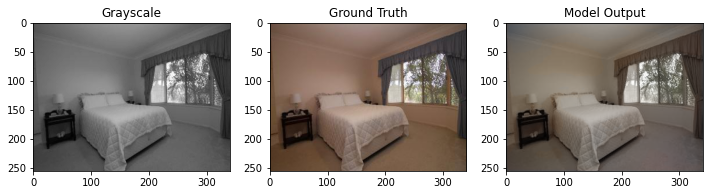

In [7]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,3,1)
ax.imshow(grayscale, cmap='gray')
ax.set_title("Grayscale")

ax = fig.add_subplot(2,3,2)
ax.imshow(images[0])
ax.set_title("Ground Truth")

ax = fig.add_subplot(2,3,3)
ax.imshow(rgb)
ax.set_title("Model Output")

The model doesn't seem to be too confident about the some of plants outside and hence we seee uneven shading of green. Althought the curtain is of a different color, it's stil rather realistic which suggests good modeling the color distribution. 

In [8]:
grayscale = np.array(Image.fromarray(images[25]).convert('L'))/255
rgb = autocolorize.colorize(grayscale, classifier=classifier)

Text(0.5, 1.0, 'Model Output')

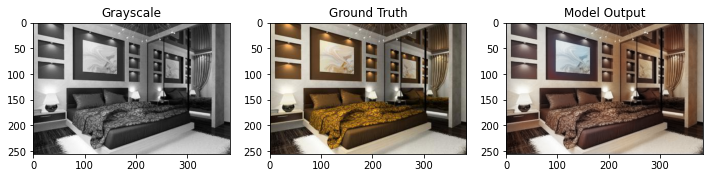

In [9]:
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(2,3,1)
ax.imshow(grayscale, cmap='gray')
ax.set_title("Grayscale")

ax = fig.add_subplot(2,3,2)
ax.imshow(images[25])
ax.set_title("Ground Truth")

ax = fig.add_subplot(2,3,3)
ax.imshow(rgb)
ax.set_title("Model Output")

Here the colors are quite close to the ground truth. The overall color scheme of the painting on the wall is off but it's one of those objects that can take on many colors as discussed in the paper. 